# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [ ]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [5]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [6]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [7]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.177101, W: 0.312753, b: 0.365500
step: 100, loss: 0.172085, W: 0.305759, b: 0.415085
step: 150, loss: 0.168152, W: 0.299565, b: 0.458996
step: 200, loss: 0.165068, W: 0.294080, b: 0.497882
step: 250, loss: 0.162649, W: 0.289223, b: 0.532318
step: 300, loss: 0.160752, W: 0.284922, b: 0.562814
step: 350, loss: 0.159264, W: 0.281112, b: 0.589819
step: 400, loss: 0.158098, W: 0.277739, b: 0.613734
step: 450, loss: 0.157183, W: 0.274752, b: 0.634913
step: 500, loss: 0.156465, W: 0.272106, b: 0.653668
step: 550, loss: 0.155903, W: 0.269764, b: 0.670276
step: 600, loss: 0.155461, W: 0.267689, b: 0.684984
step: 650, loss: 0.155115, W: 0.265852, b: 0.698009
step: 700, loss: 0.154844, W: 0.264225, b: 0.709543
step: 750, loss: 0.154631, W: 0.262784, b: 0.719757
step: 800, loss: 0.154464, W: 0.261508, b: 0.728803
step: 850, loss: 0.154333, W: 0.260379, b: 0.736813
step: 900, loss: 0.154231, W: 0.259378, b: 0.743907
step: 950, loss: 0.154150, W: 0.258492, b: 0.750189
step: 1000, l

In [8]:
import matplotlib.pyplot as plt

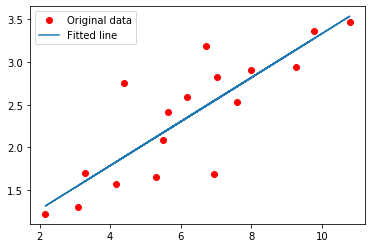

In [9]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()